In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.set_printoptions(precision = 5, suppress = True)  ##소숫점은 몇자리수까지 //지수형태로 결과물을 낼것인지

raw_data=[]
with open('가스공급량_20230217170920.csv') as f:
    for line in f:
        raw_data.append(line[:-1].split(','))
        
t = set()
for e in raw_data:
    t.add(len(e))
print(t)

np_data = np.array(raw_data[2:])
np_data = np_data[:,2:].astype(np.int64)
print(np_data[:3])

{8}
[[      1 1275714     311   91657      64  289391]
 [      1  179086     311    8775      64   26227]
 [      1  139496     311    8745      64   23518]]


(143, 6)
[  0  12  24  36  48  60  72  84  96 108 120]
[[     12 2390873    3732  173917     768  552373]
 [     12 2493021    3512  210464     801  544720]
 [     12 2596303    3380  195644     844  517630]]


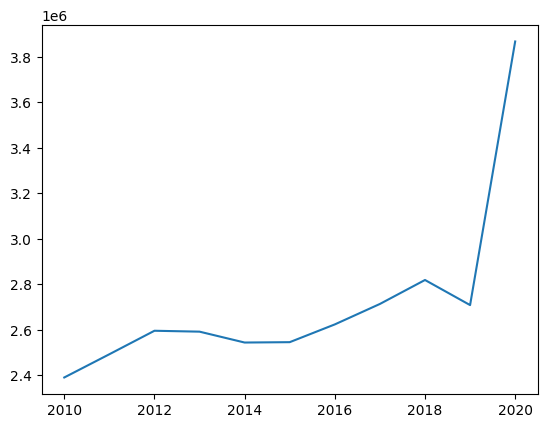

In [38]:
print(np_data.shape)
print(np.arange(0,130,12))

by_year = np.add.reduceat(np_data, np.arange(0,130,12))
print(by_year[:3])

total_gas = by_year[:,1] + by_year[:,3]
ln_gas = by_year[:,1]/total_gas
lp_gas = by_year[:,3]/total_gas



_, axe = plt.subplots()
axe.plot(np.arange(2010,2021), by_year[:,1])  #년도별 도시가스 총 사용량
#xe.plot(np.arange(2010,2021), by_year[:,1]/12) #년도별 도시가스 평균 사용량

In [39]:
import matplotlib
print(matplotlib.__version__)

3.6.3


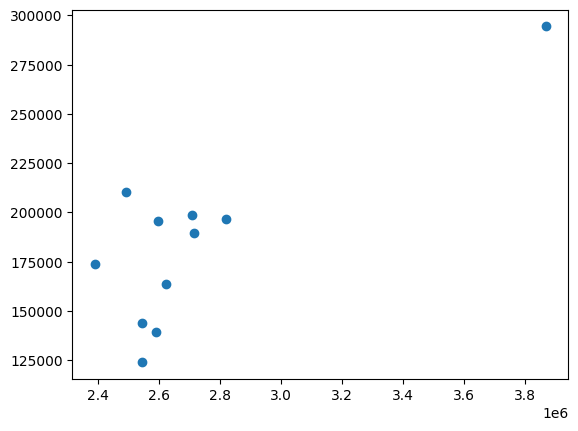

In [41]:
np.corrcoef(by_year[:,1], by_year[:,3])
_, axe = plt.subplots()
axe.scatter(by_year[:,1],by_year[:,3])

In [47]:
print(np_data[:10])
by_season = np.add.reduceat(np_data[3:], np.arange(0,130,6))
print(by_season[:3])

print('===================')
summers_sum = by_season[0::2]  # 0생략가능
print(summers_sum[:2])
winters_sum = by_season[1::2]
print(winters_sum[:2])



[[      1 1275714     311   91657      64  289391]
 [      1  179086     311    8775      64   26227]
 [      1  139496     311    8745      64   23518]
 [      1  143581     311    8092      64   23959]
 [      1  114671     311    8105      64   22909]
 [      1   79649     311    7787      64   23615]
 [      1   70646     311    7137      64   22361]
 [      1   68554     311    5928      64   24491]
 [      1   65293     311    6023      64   25393]
 [      1   62398     311    6742      64   23564]]
[[      6  542394    1866   43072     384  142728]
 [      6 1913375    1826  150551     390  404393]
 [      6  621635    1746   59660     402  139904]]
[[     6 542394   1866  43072    384 142728]
 [     6 621635   1746  59660    402 139904]]
[[      6 1913375    1826  150551     390  404393]
 [      6 1835362    1735  139848     406  385568]]


[     6 542394   1866  43072    384 142728]
[[     1 143581    311   8092     64  23959]
 [     1 114671    311   8105     64  22909]
 [     1  79649    311   7787     64  23615]
 [     1  70646    311   7137     64  22361]
 [     1  68554    311   5928     64  24491]
 [     1  65293    311   6023     64  25393]]
[      6 1913375    1826  150551     390  404393]
[[      1   62398     311    6742      64   23564]
 [      1   77985     311    6366      64   23173]
 [      1  113800     311    8560      64   23772]
 [      1  160555     311    9397      64   26409]
 [      1 1297954     291  107349      67  282017]
 [      1  200683     291   12137      67   25458]]


Ttest_indResult(statistic=-1.0870758421217064, pvalue=0.30251057389115127)

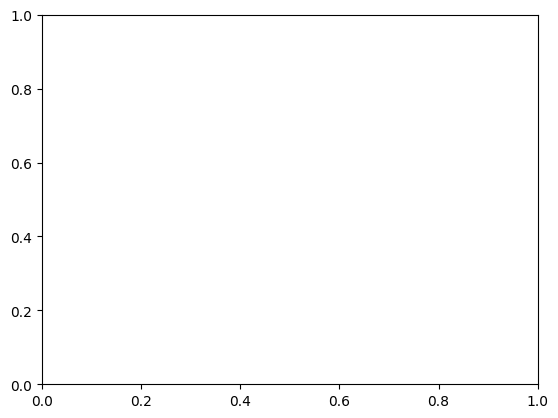

In [59]:
#2010년 여름 평균 사용량 : 프로판가스
lp_gas2010_summer = np_data[3:9, 3]
print(summers_sum[0])
print(np_data[3:9])
#2010-2011년 겨울 평균 사용량 : 프로판 가스
lp_gas2010_winter = np_data[9:15, 3]
print(winters_sum[0])
print(np_data[9:15])

# ttest 귀무가설 두개의 mean 값은 같은 모집단에서 나온 것.
# 두개의 mean값은 같은 것으로 보아야 한다.
stats.ttest_ind(lp_gas2010_summer, lp_gas2010_winter)

In [55]:
#2011년 여름,  2011-2012년 겨울 도시가스 사용량 ttest_ind
ln_gas2011_summer = np_data[15:21,1]
print(ln_gas2011_summer, np.mean(ln_gas2011_summer))

ln_gas2011_winter = np_data[21:27, 1]
print(ln_gas2011_winter, np.mean(ln_gas2011_winter))

stats.ttest_ind(ln_gas2011_summer, ln_gas2011_winter)

[144076 145930 103965  83355  74141  70168] 103605.83333333333
[  7839   5006   5304   8328 104295  12039]


Ttest_indResult(statistic=-0.8679737480239991, pvalue=0.4057565209051137)

TypeError: 'module' object is not callable

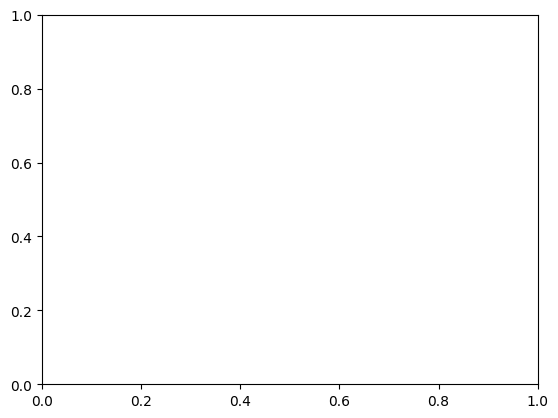

In [62]:
_, axe = plt.subplots()
year = 2010
gas_index = 3
for i in range(0,10,2):
    j = 3 + 6*i
    summer = np_data[j:j+6]
    winter = np_data[j+6:j+12]
    axe,plot(np.arange(3,9), summer[:, gas_index])
    axe.plot(np.arange(9,15), winter[:, gas_index])

In [63]:
#작업 스케쥴러 확인